<a href="https://colab.research.google.com/github/boyu571/kpc_lecture_notes/blob/master/(%EC%9E%90%EB%8F%99%ED%99%94)LOB_%EB%9D%BC%EC%9D%B8%ED%8E%B8%EC%84%B1%ED%9A%A8%EC%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumGothic'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
import random
import pandas as pd

작업자_dict1 = {
    '작업': '입고',
    '작업자': random.choices(['효리', '유리'], k=100000),
    '소요시간(분)': [random.randint(2, 3) for _ in range(100000)]
}

작업자_dict2 = {
    '작업': '검품',
    '작업자': random.choices(['명수', '지환'], k=100000),
    '소요시간(분)': [random.randint(3, 4) for _ in range(100000)]
}

작업자_dict3 = {
    '작업': '적치',
    '작업자': random.choices(['용민', '지연', '나연', '창연', '길동', '나나', '세리'], k=100000),
    '소요시간(분)': [random.randint(4, 8) for _ in range(100000)]
}

df1 = pd.DataFrame(작업자_dict1)
df2 = pd.DataFrame(작업자_dict2)
df3 = pd.DataFrame(작업자_dict3)

df = pd.concat([df1, df2, df3], ignore_index=True)
df

,작업,작업자,소요시간(분)
0,입고,유리,2
1,입고,유리,2
2,입고,유리,2
3,입고,효리,2
4,입고,효리,2
...,...,...,...
299995,적치,세리,7
299996,적치,창연,6
299997,적치,나나,6
299998,적치,세리,7


In [4]:
# 스탠다드타임 계산 및 컬럼명 변경
스탠다드타임 = df.groupby('작업')['소요시간(분)'].mean().reset_index()
ST = 스탠다드타임.rename(columns={'소요시간(분)': 'ST'})
ST = round(ST,1)
ST

,작업,ST
0,검품,3.5
1,입고,2.5
2,적치,6.0


0    66.666667
Name: 라인편성효율(%), dtype: float64


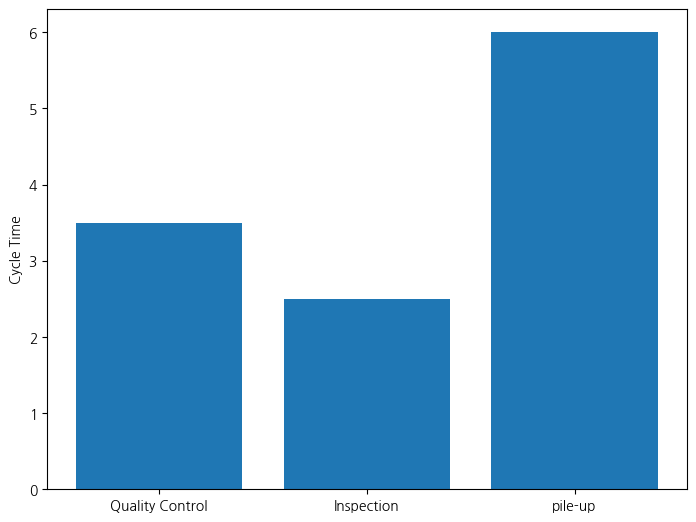

,작업,ST,소요시간합계,애로작업시간,작업수,라인공수,라인편성효율(%),작업량,인당 일작업량
0,검품,3.5,12.0,6.0,3,18.0,66.666667,80.0,26.666667
1,입고,2.5,12.0,6.0,3,18.0,66.666667,80.0,26.666667
2,적치,6.0,12.0,6.0,3,18.0,66.666667,80.0,26.666667


In [5]:
ST['소요시간합계'] = ST["ST"].sum()
ST['애로작업시간'] = ST["ST"].max()
ST['작업수'] = ST['작업'].nunique()
ST['라인공수'] = ST['작업수']*ST['애로작업시간']

ST['라인편성효율(%)'] = 100*(ST['소요시간합계']/ST['라인공수'])
근무시간_1일 = 480
ST['작업량'] = 근무시간_1일/ST['애로작업시간']
ST['인당 일작업량'] = ST['작업량']/ST['작업수']

ST['라인공수']

현재 = ST['라인편성효율(%)'].drop_duplicates()
print(현재)
import matplotlib.pyplot as plt
#no = 3  # number of process steps
#process = ['Task %s ' %s for s in ST['작업']]
#ST
process = ["Quality Control","Inspection",  "pile-up"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# 이미지의 x축의 시작위치, 이미지의 y축의 시작위치, 이미지의 가로길이, 이미지의 높이
ax.set_ylabel('Cycle Time')
ax.bar(process,ST["ST"])
#ax.axhline(y=3)
plt.show()
ST

In [6]:
# 택트타임 계산
전체_작업_시간 = df['소요시간(분)'].sum()
작업_수 = df.shape[0]
택트타임 = 전체_작업_시간 / 작업_수
print("택트타임:", 택트타임)

택트타임: 4.000143333333333


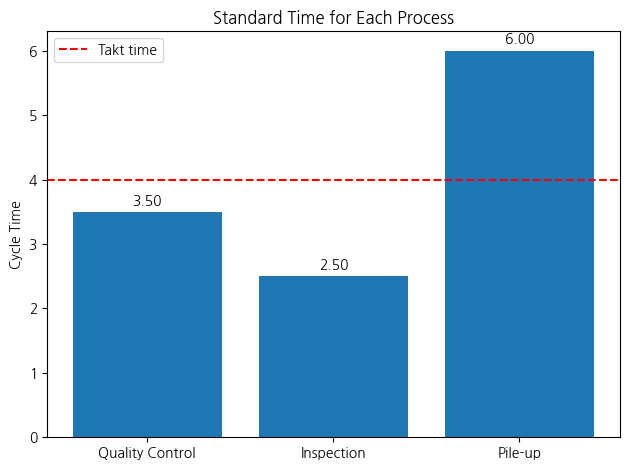

In [7]:
import matplotlib.pyplot as plt

process = [ "Quality Control","Inspection", "Pile-up"]
fig, ax = plt.subplots()
ax.set_ylabel('Cycle Time')

# Plotting the bar chart
bar_plot = ax.bar(process, ST['ST'])

# Adding labels to the bars
for rect in bar_plot:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Adding a horizontal line at y=3
ax.axhline(y=택트타임, color='red', linestyle='--', label='Takt time')

# Setting the plot title and legend
ax.set_title('Standard Time for Each Process')
ax.legend()

# Adjusting the layout to prevent labels from being cut off
fig.tight_layout()

# Displaying the plot
plt.show()

In [8]:
ST1 = ST[['작업', 'ST']]
ST1.loc[ST1['작업'] == '적치', '작업'] = '적치대기'
ST1.loc[ST1['작업'] == '적치대기', 'ST'] = 3.0

new_row = pd.DataFrame({'작업': ['적치완료'], 'ST': [3.0]})
ST1 = pd.concat([ST1, new_row], ignore_index=True)

ST1

<ipython-input-8-39d987de11f0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ST1 = ST1.append(new_row, ignore_index=True)


,작업,ST
0,검품,3.5
1,입고,2.5
2,적치대기,3.0
3,적치완료,3.0


In [9]:

ST2 = ST[ST['작업'] != '검품']
ST2.loc[ST2['작업'] == '입고', '작업'] = '입고, 검품'
ST2.loc[ST2['작업'] == '입고, 검품', 'ST'] = 6.0
ST2 = ST2[['작업', 'ST']]
ST2

,작업,ST
1,"입고, 검품",6.0
2,적치,6.0


In [10]:

ST3 = ST2[ST2['작업'] != '적치']
ST3[['작업', 'ST']]
ST3.loc[ST3['작업'] == '입고, 검품', '작업'] = '입고, 검품, 적치'
ST3.loc[ST3['작업'] == '입고, 검품, 적치', 'ST'] = 12.0
ST3 = ST3[['작업', 'ST']]
ST3

,작업,ST
1,"입고, 검품, 적치",12.0


In [11]:
#개선안1

ST1['소요시간합계'] = ST1["ST"].sum()
ST1['애로작업시간'] = ST1["ST"].max()
ST1['작업수'] = ST1['작업'].nunique()
ST1['라인공수'] = ST1['작업수']*ST1['애로작업시간']

ST1['라인편성효율(%)'] = 100*(ST1['소요시간합계']/ST1['라인공수'])
근무시간_1일 = 480
ST1['작업량'] = 근무시간_1일/ST1['애로작업시간']
ST1['인당 일작업량'] = ST1['작업량']/ST1['작업수']


개선안1_1 = ST1['라인편성효율(%)'].drop_duplicates()
개선안1_2 = ST1['작업수'].drop_duplicates()
combined_df1 = pd.DataFrame({'라인편성효율(%)': 개선안1_1, '작업수': 개선안1_2,'개선안': "개선안1"})
combined_df1

,라인편성효율(%),작업수,개선안
0,85.714286,4,개선안1


In [12]:
#개선안2

ST2['소요시간합계'] = ST2["ST"].sum()
ST2['애로작업시간'] = ST2["ST"].max()
ST2['작업수'] = ST2['작업'].nunique()
ST2['라인공수'] = ST2['작업수']*ST2['애로작업시간']

ST2['라인편성효율(%)'] = 100*(ST2['소요시간합계']/ST2['라인공수'])
근무시간_1일 = 480
ST2['작업량'] = 근무시간_1일/ST2['애로작업시간']
ST2['인당 일작업량'] = ST2['작업량']/ST2['작업수']

개선안2_1 = ST2['라인편성효율(%)'].drop_duplicates()
개선안2_2 = ST2['작업수'].drop_duplicates()
combined_df2 = pd.DataFrame({'라인편성효율(%)': 개선안2_1, '작업수': 개선안2_2,'개선안': "개선안2"})
combined_df2

,라인편성효율(%),작업수,개선안
1,100.0,2,개선안2


In [13]:
#개선안3

ST3['소요시간합계'] = ST3["ST"].sum()
ST3['애로작업시간'] = ST3["ST"].max()
ST3['작업수'] = ST3['작업'].nunique()
ST3['라인공수'] = ST3['작업수']*ST3['애로작업시간']

ST3['라인편성효율(%)'] = 100*(ST3['소요시간합계']/ST3['라인공수'])
근무시간_1일 = 480
ST3['작업량'] = 근무시간_1일/ST3['애로작업시간']
ST3['인당 일작업량'] = ST3['작업량']/ST3['작업수']


개선안3_1 = ST3['라인편성효율(%)'].drop_duplicates()
개선안3_2 = ST3['작업수'].drop_duplicates()
combined_df3 = pd.DataFrame({'라인편성효율(%)': 개선안3_1, '작업수': 개선안3_2,'개선안': "개선안3"})
combined_df3

,라인편성효율(%),작업수,개선안
1,100.0,1,개선안3


In [14]:

현재_1 = ST['라인편성효율(%)'].drop_duplicates()
현재_2 = ST['작업수'].drop_duplicates()
combined_df = pd.DataFrame({'라인편성효율(%)': 현재_1, '작업수': 현재_2,'개선안': "현재"})
combined_df

,라인편성효율(%),작업수,개선안
0,66.666667,3,현재


In [15]:
combined = pd.concat([combined_df, combined_df1, combined_df2, combined_df3], axis=0)
combined

,라인편성효율(%),작업수,개선안
0,66.666667,3,현재
0,85.714286,4,개선안1
1,100.000000,2,개선안2
1,100.000000,1,개선안3


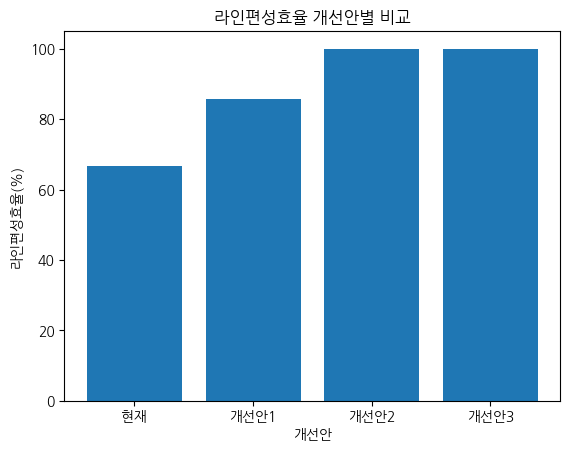

In [16]:

# Extract the data from the DataFrame
효율 = combined['라인편성효율(%)']
작업수 = combined['작업수']
개선안 = combined['개선안']

# Create a bar plot
plt.bar(개선안, 효율)

# Add labels and title
plt.xlabel('개선안')
plt.ylabel('라인편성효율(%)')
plt.title('라인편성효율 개선안별 비교')

# Display the plot
plt.show()

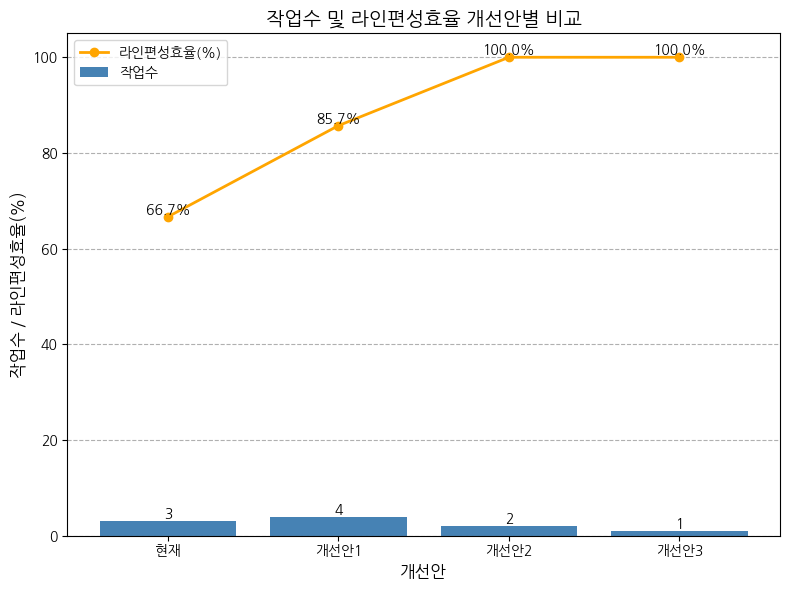

In [17]:
import matplotlib.pyplot as plt

# Set the font family
plt.rcParams['font.family'] = 'NanumGothic'


# Extract the data from the DataFrame
효율 = combined['라인편성효율(%)']
작업수 = combined['작업수']
개선안 = combined['개선안']

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a bar plot for 작업수
plt.bar(개선안, 작업수, color='steelblue', label='작업수')

# Create a line plot for 라인편성효율(%)
plt.plot(개선안, 효율, marker='o', color='orange', linestyle='-', linewidth=2, label='라인편성효율(%)')

# Add labels and title
plt.xlabel('개선안', fontsize=12)
plt.ylabel('작업수 / 라인편성효율(%)', fontsize=12)
plt.title('작업수 및 라인편성효율 개선안별 비교', fontsize=14)

# Add data labels on top of each bar
for i, v in enumerate(작업수):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# Add data labels on the line plot
for i, v in enumerate(효율):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--')

# Adjust the spacing between bars
plt.tight_layout()

# Display the legend
plt.legend()

# Display the plot
plt.show()


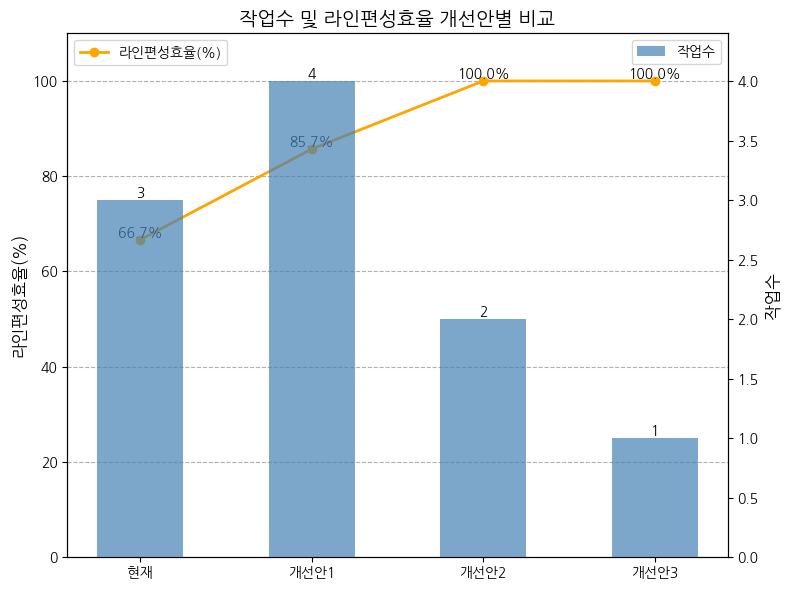

In [ ]:
import matplotlib.pyplot as plt

# Set the font family
plt.rcParams['font.family'] = 'NanumGothic'

# Extract the data from the DataFrame
효율 = combined['라인편성효율(%)']
작업수 = combined['작업수']
개선안 = combined['개선안']

# Set the figure size
fig, ax1 = plt.subplots(figsize=(8, 6))

# Create a line plot for 라인편성효율(%)
ax1.plot(개선안, 효율, marker='o', color='orange', linestyle='-', linewidth=2, label='라인편성효율(%)')
ax1.set_ylabel('라인편성효율(%)', fontsize=12)
ax1.set_ylim(0, 110)

# Create a bar plot for 작업수
ax2 = ax1.twinx()
ax2.bar(개선안, 작업수, color='steelblue', alpha=0.7, width=0.5, label='작업수')
ax2.set_ylabel('작업수', fontsize=12)
ax2.set_ylim(0, max(작업수) * 1.1)

# Add data labels on top of each bar
for i, v in enumerate(작업수):
    ax2.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# Add data labels on the line plot
for i, v in enumerate(효율):
    ax1.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('개선안', fontsize=12)
plt.title('작업수 및 라인편성효율 개선안별 비교', fontsize=14)

# Add gridlines
ax1.grid(axis='y', linestyle='--')

# Adjust the spacing between bars
plt.tight_layout()

# Set the x-axis tick labels closer together
plt.xticks(개선안)

# Display the legends
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=10)

# Display the plot
plt.show()


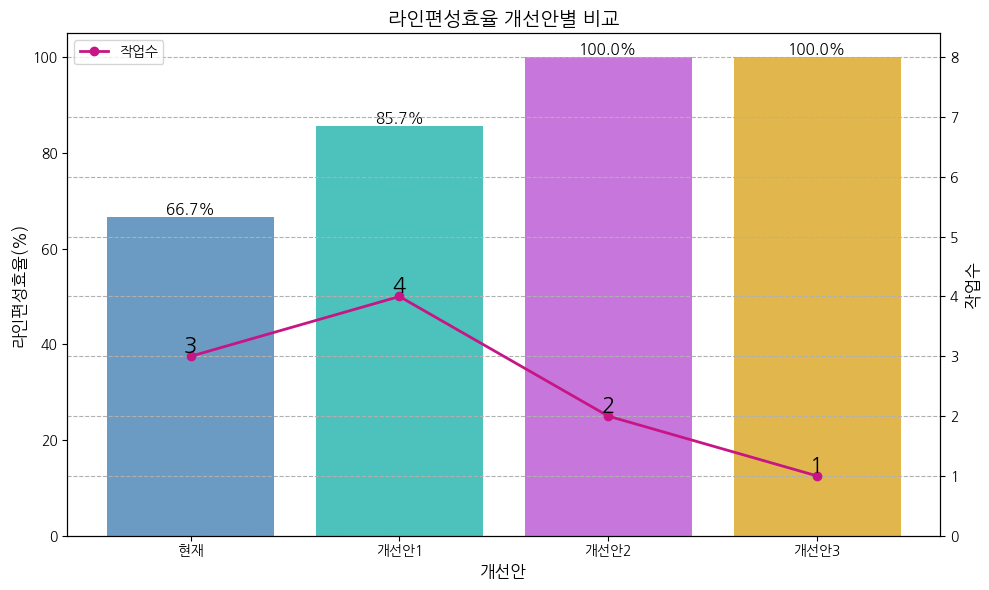

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the font family
plt.rcParams['font.family'] = 'NanumGothic'

# Extract the data from the DataFrame
효율 = combined['라인편성효율(%)']
작업수 = combined['작업수']
개선안 = combined['개선안']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot with customized colors
colors = ['steelblue', 'lightseagreen', 'mediumorchid', 'goldenrod']
plt.bar(개선안, 효율, color=colors, alpha=0.8, label='라인편성효율(%)')

# Add labels and title
plt.xlabel('개선안', fontsize=12)
plt.ylabel('라인편성효율(%)', fontsize=12)
plt.title('라인편성효율 개선안별 비교', fontsize=14)

# Add data labels on top of each bar
for i, v in enumerate(효율):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=11)

# Plot the line graph for 작업수
plt.twinx()
plt.plot(개선안, 작업수, marker='o', linestyle='-', color='mediumvioletred', linewidth=2, label='작업수')

# Add labels for the line graph
for i, v in enumerate(작업수):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=16)

# Set y-axis label for the line graph
plt.ylabel('작업수', fontsize=12)

# Set the y-axis limits for the line graph
plt.ylim(0, max(작업수) * 2.1)

# Customize the tick marks and gridlines
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Create a legend
plt.legend(loc='upper left')

# Adjust the spacing between bars
plt.tight_layout()

# Display the plot
plt.show()
